,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

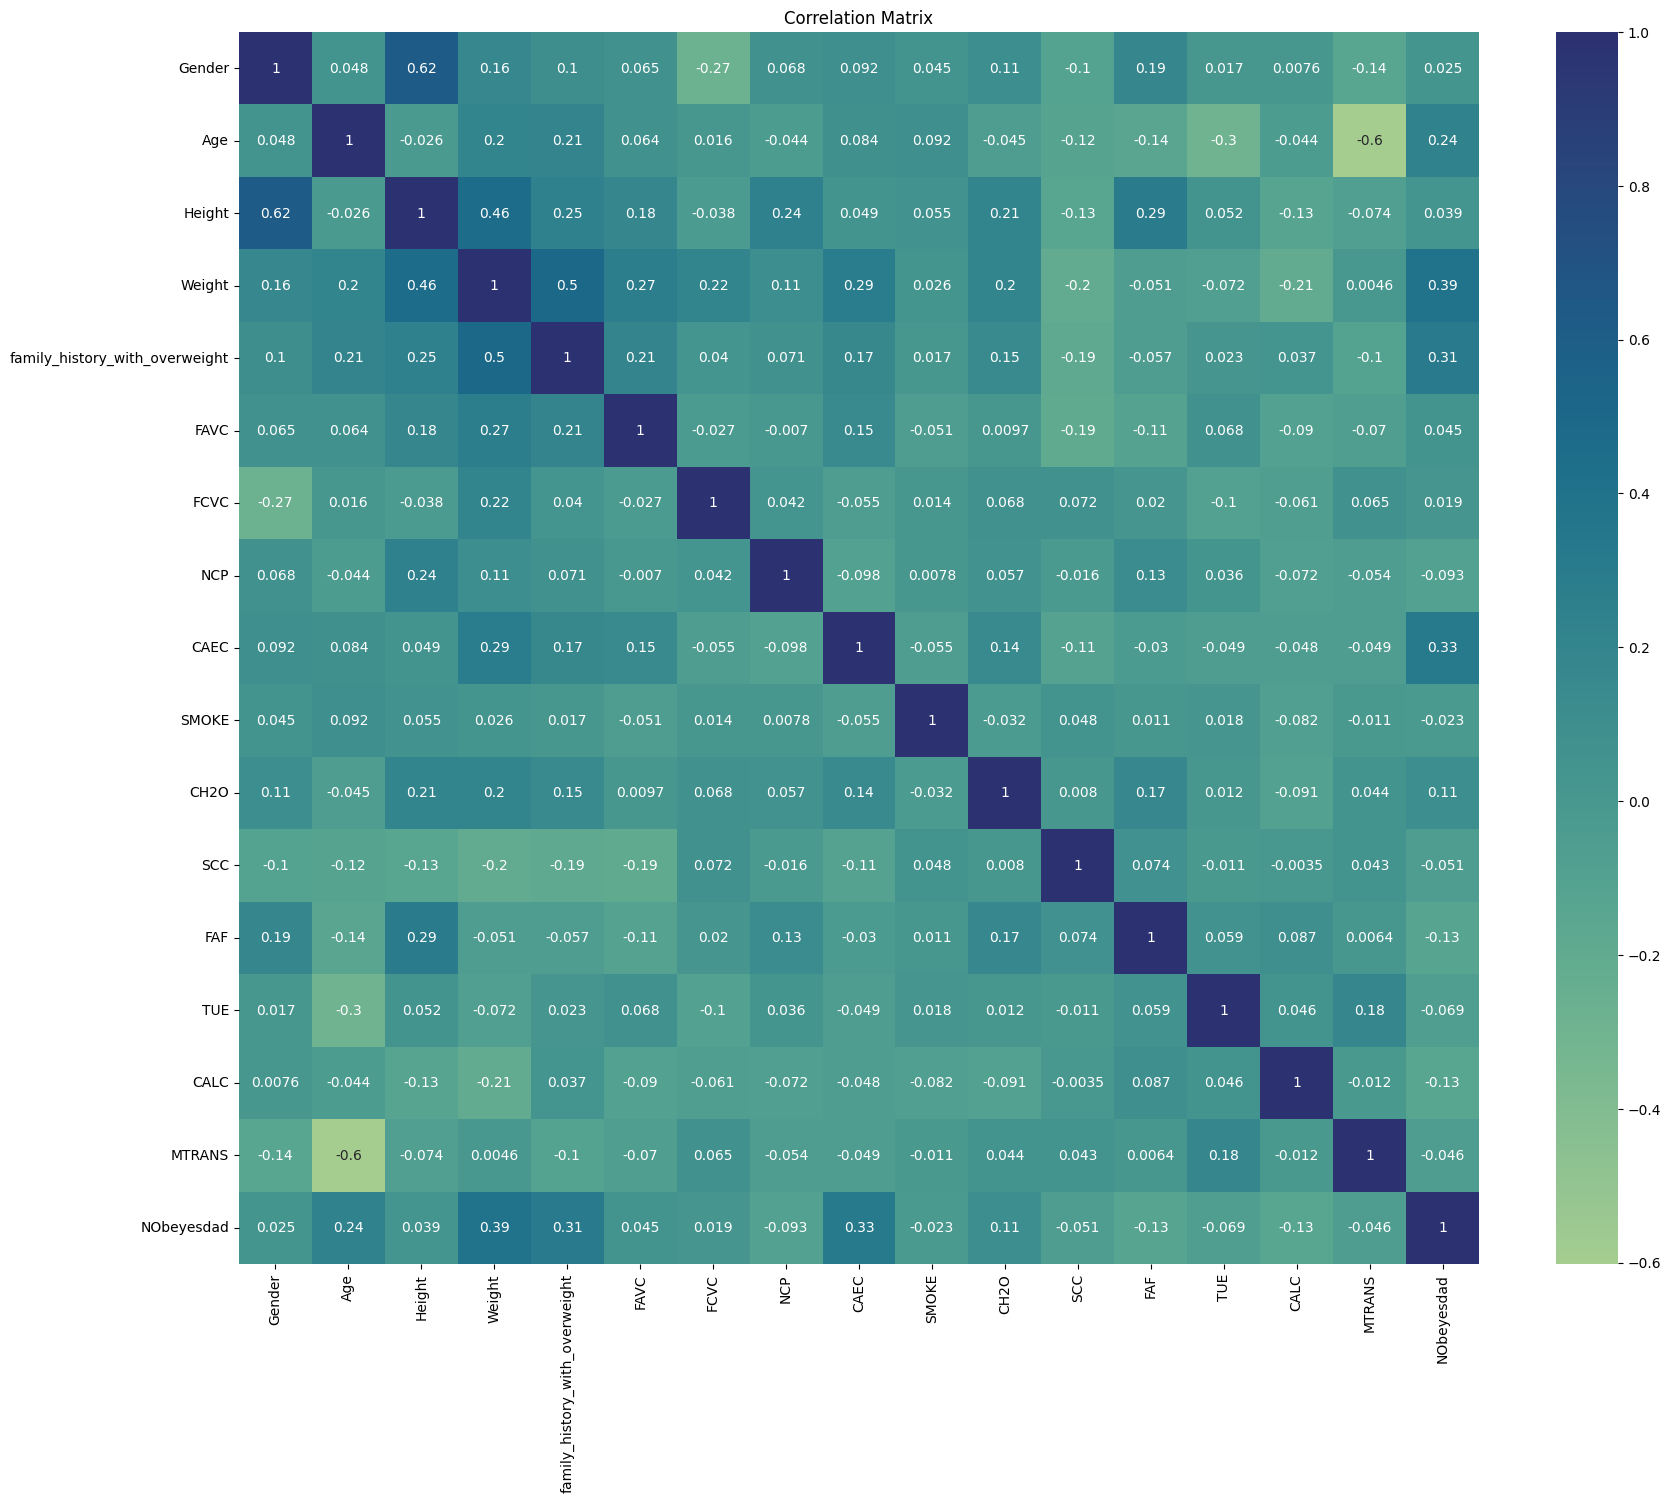

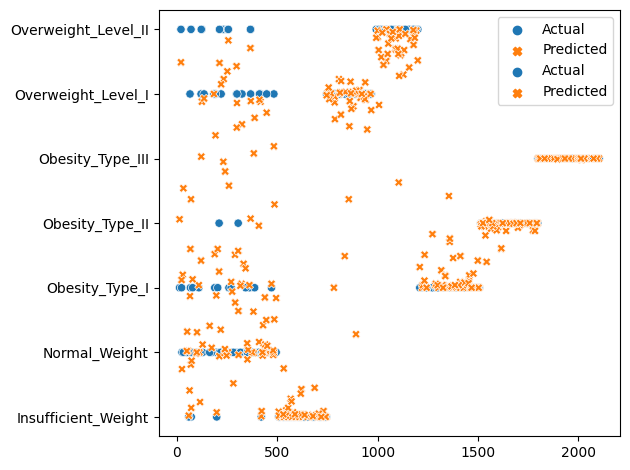

Accuracy: 96.84542586750788
Accuracy: 96.84542586750788
Accuracy: 80.7570977917981
Accuracy: 60.56782334384858
Accuracy for Logistic Regression: 0.81
Accuracy for Random Forest: 0.96
Accuracy for Support Vector Machine: 0.61
Accuracy for XGBoost: 0.97


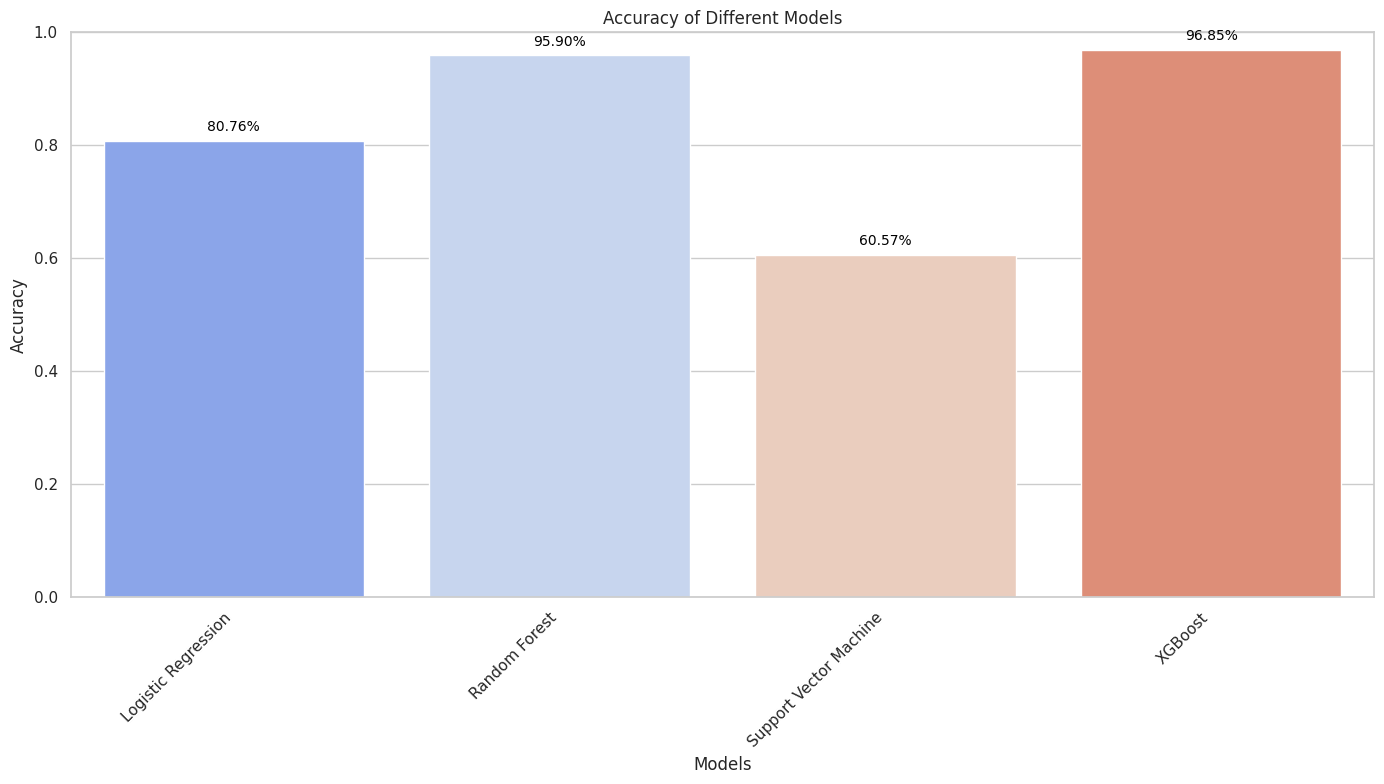

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv')
display(df.head(10))
print(df.info())
print('Shape:', df.shape)
df.isna().sum()
df.describe(include = 'object')
from sklearn.preprocessing import LabelEncoder
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

encoder = LabelEncoder()

columns_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])
 
corr = df.corr()

plt.figure(figsize = (20,16))
sns.heatmap(corr, annot = True, cmap = 'crest')

plt.title('Correlation Matrix')

plt.show()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  

X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


regressor = RandomForestRegressor()

regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

predictions = regressor.predict(X_test)
checking_df = pd.DataFrame({'Actual': y_test, 'Predicted' : predictions})

sns.scatterplot(checking_df)
sns.scatterplot(checking_df)

plt.yticks([0, 1, 2, 3, 4, 5, 6], ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']) # encoder.classes_ helps find variable name

plt.tight_layout()
plt.show()

X = df.drop(['NObeyesdad'],axis =1)
Y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=13)

RForest = RandomForestClassifier(n_estimators = 100)
RForest.fit(X_train, y_train)
y_pred = RForest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

svc = SVC()
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, pred)*100
print(f'Accuracy: {accuracy}')

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier()
}

accuracies = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy for {model_name}: {accuracy:.2f}')

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
barplot = sns.barplot(x=list(models.keys()), y=accuracies, palette="coolwarm")
barplot.set(xlabel='Models', ylabel='Accuracy', title='Accuracy of Different Models')

for p, acc in zip(barplot.patches, accuracies):
    barplot.annotate(f'{acc:.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                     textcoords='offset points')

barplot.yaxis.grid(True)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()  
plt.ylim([0, 1])
plt.show()





